# Credit Card Default Prediction: Full Machine Learning Pipeline

This notebook will guide you through a complete machine learning solution, starting from Exploratory Data Analysis (EDA) to Model Evaluation. We will focus on predicting whether a customer will default on their next credit card payment using a dataset from UCI.

## Steps Covered:

1. **Exploratory Data Analysis (EDA)**
2. **Data Preprocessing**
3. **Model Training**
4. **Model Evaluation**
5. **Conclusions**


## 1. Exploratory Data Analysis (EDA)

Let’s start by exploring the dataset. We’ll begin with a basic overview of the data, check for missing values, and visualize key features.


In [12]:
# Step 1: Load the dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('data/UCI_Credit_Card.csv')

# Display the first few rows
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
# Step 1.1: Summary statistics and missing values
# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Target Variable Distribution
We will now check the distribution of the target variable (`default.payment.next.month`) to see if the dataset is imbalanced.


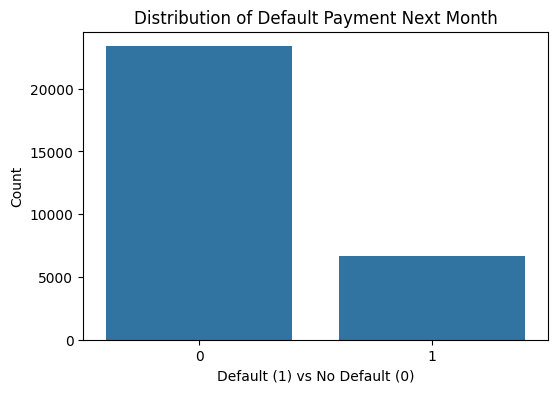

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='default.payment.next.month', data=data)
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default (1) vs No Default (0)')
plt.ylabel('Count')
plt.show()


### Correlation Analysis
Next, we will check the correlations between features to see if any variables are strongly related to the target.


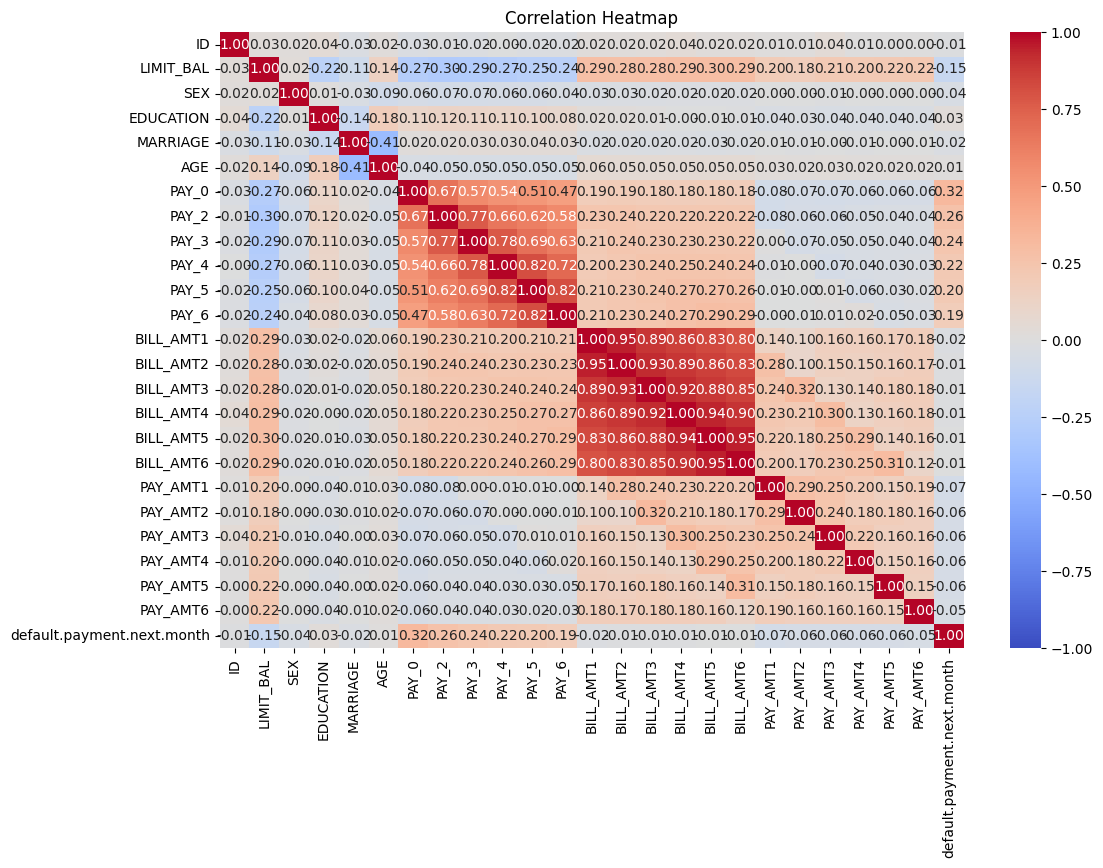

In [15]:
# Step 1.2: Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


## 2. Data Preprocessing

Now that we have explored the data, let’s proceed with preprocessing. This will include:

1. **Feature Encoding** for categorical variables
2. **Scaling** the numerical features
3. **Splitting** the data into training and test sets


In [16]:
# Step 2: Preprocessing

# Feature Encoding: Convert categorical variables to one-hot encoding
# data['SEX'] = data['SEX'].map({1: 'Male', 2: 'Female'})
data = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

# Define features and target variable
X = data.drop(columns=['ID', '`default.payment.next.month`'])
y = data['default.payment.next.month']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Model Training

We will train three different models to predict credit card default:

- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine (SVM)**


In [17]:
# Step 3: Train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Train and evaluate models
log_reg_results = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
random_forest_results = evaluate_model(random_forest, X_train_scaled, X_test_scaled, y_train, y_test)
svm_results = evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test)


## 4. Model Evaluation

We will compare the models using accuracy, precision, recall, and F1-score.


In [18]:
# Step 4: Model evaluation
import pandas as pd

# Compile results
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [log_reg_results[0], random_forest_results[0], svm_results[0]],
    'Precision': [log_reg_results[1], random_forest_results[1], svm_results[1]],
    'Recall': [log_reg_results[2], random_forest_results[2], svm_results[2]],
    'F1 Score': [log_reg_results[3], random_forest_results[3], svm_results[3]]
})

model_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.808833,0.692308,0.244160,0.361003
1,Random Forest,0.813000,0.632600,0.368500,0.465714
2,SVM,0.817333,0.673684,0.337604,0.449799


## 5. Conclusion

Based on the evaluation metrics, the best model for predicting credit card defaults is determined by balancing the trade-offs between precision, recall, and F1-score. Further steps could involve:

- **Hyperparameter tuning** to optimize model performance.
- **Handling class imbalance** using techniques like SMOTE or class weights.
- **Feature Engineering** to improve predictive power.

This notebook demonstrates the end-to-end process of building a machine learning model in a structured and professional manner.
